In [1]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/kaggle/input/data-final/demand_forecasting_pattern.csv')
df.head()


,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments,DayOfWeek,IsWeekend,Month,Season,IsHoliday,IsFestival,Seasonal Type
0,6892,1/1/2024 12:00,19,320,48.75,Yes,Festival,Competitor Pricing,Stable,Regular,0,False,1,Winter,True,True,Festival
1,6892,1/2/2024 12:00,19,280,55.12,No,NaN,Weather,Increasing,Budget,1,False,1,Winter,False,False,Winter
2,6892,1/3/2024 12:00,19,350,50.34,Yes,Holiday,NaN,Stable,Regular,2,False,1,Winter,False,False,Holiday
3,6892,1/4/2024 12:00,19,400,52.67,No,Festival,Weather,Increasing,Premium,3,False,1,Winter,False,True,Festival
4,6892,1/5/2024 12:00,19,310,49.15,Yes,NaN,Economic Indicator,Stable,Budget,4,False,1,Winter,False,False,Normal


In [4]:
df.dtypes

Product ID               int64
Date                    object
Store ID                 int64
Sales Quantity           int64
Price                  float64
Promotions              object
Seasonality Factors     object
External Factors        object
Demand Trend            object
Customer Segments       object
DayOfWeek                int64
IsWeekend                 bool
Month                    int64
Season                  object
IsHoliday                 bool
IsFestival                bool
Seasonal Type           object
dtype: object

07:31:35 - cmdstanpy - INFO - Chain [1] start processing
07:31:35 - cmdstanpy - INFO - Chain [1] done processing


Store 19 - MAE: 37.60


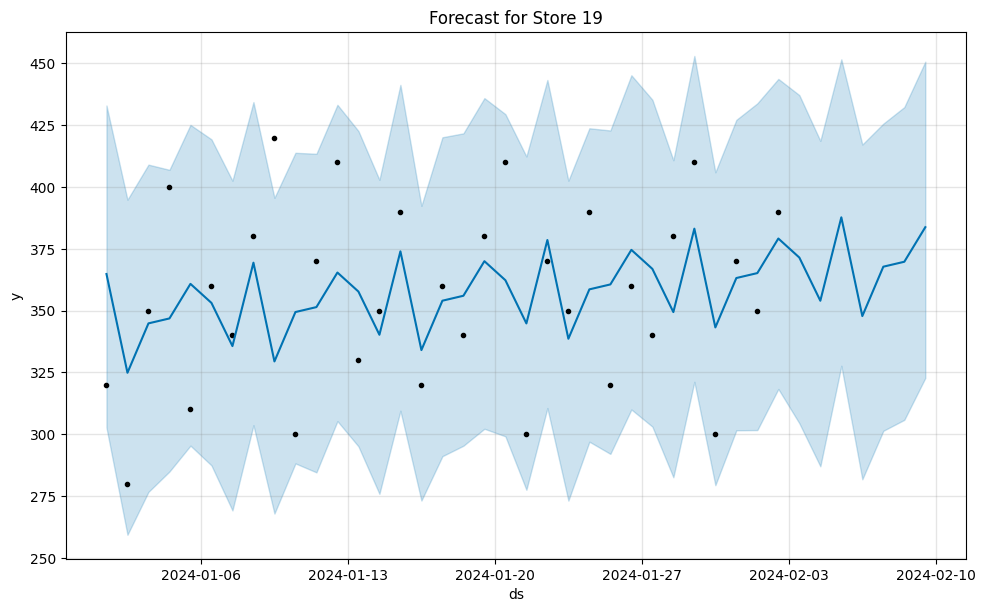

(                    ds       trend  yhat_lower  yhat_upper  trend_lower  \
 0  2024-01-01 12:00:00  345.297960  302.665368  432.987562   345.297960   
 1  2024-01-02 12:00:00  345.953290  259.284522  394.868222   345.953290   
 2  2024-01-03 12:00:00  346.608620  276.648015  409.057476   346.608620   
 3  2024-01-04 12:00:00  347.263950  284.882128  406.962182   347.263950   
 4  2024-01-05 12:00:00  347.919280  295.354198  425.141571   347.919280   
 5  2024-01-06 12:00:00  348.574610  287.355442  419.300708   348.574610   
 6  2024-01-07 12:00:00  349.229940  269.133710  402.540841   349.229940   
 7  2024-01-08 12:00:00  349.885270  303.630791  434.365526   349.885270   
 8  2024-01-09 12:00:00  350.540599  267.865169  395.616837   350.540599   
 9  2024-01-10 12:00:00  351.195929  288.151880  413.846104   351.195929   
 10 2024-01-11 12:00:00  351.851259  284.539194  413.455589   351.851259   
 11 2024-01-12 12:00:00  352.506589  305.271573  433.260275   352.506589   
 12 2024-01-

In [5]:
def demand_forecast(store_id, product_id, periods=7, plot=False):
    sub_df = df[(df['Store ID'] == store_id) & (df['Product ID'] == product_id)].copy()
    
    sub_df.drop(columns=[
    'Product ID',
    'Store ID',
    'Price',
    'Promotions',
    'Seasonality Factors',
    'External Factors',
    'Demand Trend',
    'Customer Segments',
    'DayOfWeek',
    'IsWeekend',
    'Month',
    'Season',
    'IsHoliday',
    'IsFestival',
    'Seasonal Type',
    
    ], inplace=True)

    sub_df.columns = ['ds', 'y']

    sub_df['ds'] = pd.to_datetime(sub_df['ds'])

    
    train = sub_df[:-periods]
    test = sub_df[-periods:]

    if train['y'].notnull().sum() < 2:
        print(f"Not enough data for store {store_id}")
        return None

    m = Prophet(interval_width = 0.95)
    m.fit(train)
    future = m.make_future_dataframe(periods=periods, freq='D')
    forecast = m.predict(future)
    
    merged = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds', how='inner')
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    print(f"Store {store_id} - MAE: {mae:.2f}")
    
    if plot:
        fig = m.plot(forecast)
        plt.title(f"Forecast for Store {store_id}")
        plt.show()
    return forecast, mae
demand_forecast(store_id=19, product_id=6892, plot=True)